<big><big><b>Recap</b></big></big>

👇 Run the code below to import the `ML_Cars_Recap_dataset.csv` dataset ([available here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv)) from the data folder.

⚠️ This is not the exact same dataset as the one in exercise 3. You need to download it! ⚠️

In [1]:
# # Un-comment to download
# !curl -s "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv" > data/ML_Cars_Recap_Dataset.csv

In [2]:
import pandas as pd

df = pd.read_csv("./data/ML_Cars_Recap_dataset.csv")

df.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

# Data preparation

## Duplicates

👇 Drop duplicates.

In [3]:
df.duplicated().sum()/len(df)

0.06829268292682927

In [4]:
df.drop_duplicates(inplace=True)

## Missing data

What is the `NaN` percentage for each column?

In [5]:
df.isnull().sum()

aspiration        0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

## Scaling

👇 Plot boxplots and histograms of the dataset to determine your scaler.

<AxesSubplot:>

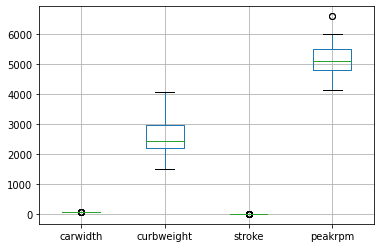

In [6]:
df.boxplot()

In [7]:
df.describe()

,carwidth,curbweight,stroke,peakrpm
count,191.000000,191.000000,191.000000,191.000000
mean,65.973443,2573.183246,3.258822,5116.230366
std,2.094681,525.730642,0.317484,467.747603
min,60.300000,1488.000000,2.070000,4150.000000
25%,64.200000,2190.500000,3.110000,4800.000000
50%,65.600000,2443.000000,3.290000,5100.000000
75%,66.900000,2964.500000,3.410000,5500.000000
max,72.300000,4066.000000,4.170000,6600.000000


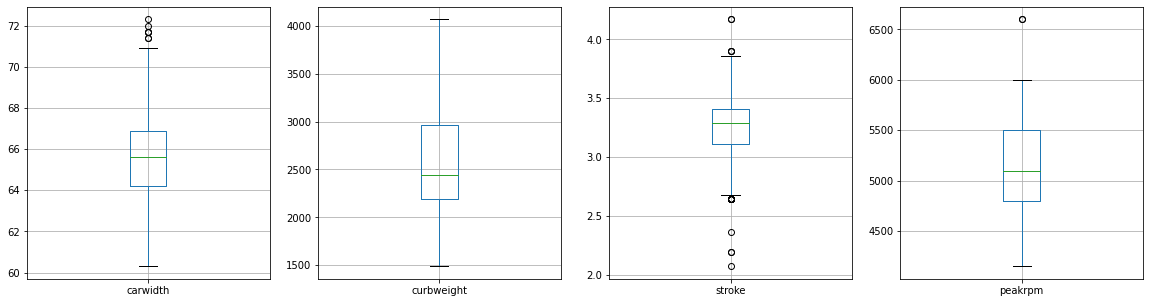

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
col_num= df.describe().columns
for i in range(len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    df[[col_num[i]]].boxplot()


👇 Scale your Features

In [9]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

df[col_num] = r_scaler.fit_transform(df[col_num])


In [10]:
df.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,-0.555556,0.135659,dohc,four,-2.033333,-0.142857,expensive
2,std,-0.037037,0.490956,ohcv,six,0.600000,-0.142857,expensive
3,std,0.106644,-0.136951,ohc,four,0.366667,0.571429,expensive
4,std,0.296296,0.492248,ohc,five,0.366667,0.571429,expensive
5,std,0.259259,0.082687,ohc,five,0.366667,0.571429,expensive


ℹ️ Robust Scaling all the numerical features is a quick and efficient way of scaling. It can be done as part of preliminary data preparation, in order to quickly get a model up and running. Obviously, we suggest to then investigate features in more depth, and to preprocess them accordingly.

## Encoding

👇 Manually encode the ordinal feature `cylindernumber`.

In [11]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [12]:
df.cylindernumber = df.cylindernumber.map({
    "four":4,
    'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8
})

👇 One hot Encode the multicategorical feature `enginetype`.


In [13]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(df[['enginetype']])

OneHotEncoder(sparse=False)

In [15]:
ohe.categories_

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

In [16]:
df[ohe.categories_[0]]=ohe.transform(df[['enginetype']])
df

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,std,-0.555556,0.135659,dohc,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,std,-0.037037,0.490956,ohcv,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,std,0.106644,-0.136951,ohc,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,std,0.296296,0.492248,ohc,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,std,0.259259,0.082687,ohc,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,1.222222,0.657623,ohc,4,-0.466667,0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,turbo,1.185185,0.782946,ohc,4,-0.466667,0.285714,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,std,1.222222,0.735142,ohcv,6,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,turbo,1.222222,1.000000,ohc,6,0.366667,-0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
df.drop(columns="enginetype",inplace=True)

👇 Encode binary feature `aspiration`

In [18]:
from sklearn.preprocessing import OneHotEncoder

aspi_ohe = OneHotEncoder(sparse=False,drop="if_binary")

aspi_ohe.fit(df[['aspiration']])
df.aspiration = aspi_ohe.transform(df[['aspiration']])

👇 Encode the target `price`

In [19]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
df.price= l_encoder.fit_transform(df["price"])

df.price

0      1
2      1
3      1
4      1
5      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: price, Length: 191, dtype: int64

# Modelling

👇 Cross-validate a Logistic Regression model.

In [20]:
df.head()

,aspiration,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,-0.555556,0.135659,4,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.037037,0.490956,6,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.106644,-0.136951,4,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.296296,0.492248,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.259259,0.082687,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = df.drop(columns='price')
y = df.price

model = LogisticRegression()

score = cross_val_score(model,X,y,cv=5).mean()

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

X = df.drop(columns='price')
y = df.price

model = LogisticRegression()

scores = cross_validate(model,X,y,cv=10)

In [23]:
scores['test_score'].mean()

0.8534210526315789

In [24]:
scores["test_score"].std()

0.09641819405093793

👇 Train a model on the entire dataset.

In [25]:
model = model.fit(X,y)

# Predicting

👇 Predict whether the following car is cheap or expensive.

In [26]:
car_specificities = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]

column_names = ['aspiration',
 'carwidth',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'stroke',
 'peakrpm']

new_car = pd.DataFrame(data = [car_specificities], columns = column_names)

new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


⚠️ The **exact same transformations** made to the training data must be applied to the new data ⚠️

## Preparing new data point

ℹ️ We can use the same transformers since they stored constants used for transformations as attributes. Be careful to not `fit()` again, but only to `transform()` ⚠️

👇 Scaling

In [27]:
new_car[col_num]=r_scaler.transform(new_car[col_num])

👇 Encoding `cylindernumber`

In [28]:
new_car.cylindernumber = [4]

In [29]:
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,0.106644,-0.735142,ohc,4,-0.6,0.428571


👇 Encode `enginetype`

In [30]:
new_car[ohe.categories_[0]]=ohe.transform(new_car[["enginetype"]])

In [31]:
new_car.drop(columns="enginetype",inplace=True)

👇 Encode `aspiration`

In [32]:
new_car["aspiration"]=aspi_ohe.transform(new_car[["aspiration"]])

## Predicting new data point

👇 Now that the new data point has been preprocessed in the exact same way, it can be fed to the model for prediction. 

ℹ️ The output can be decoded back to its original form with the original transformer. Any transformer has an `inverse_transform()` method.

In [33]:
l_encoder.inverse_transform(model.predict(new_car))

array(['cheap'], dtype=object)

# Aparté : Ordinal Encoding vs Label Encoding

## Encoding 1 categorical column

In [45]:
df_enc = pd.DataFrame(['Male', 'Female', 'Female'],columns=['Gender'])

In [46]:
df_enc

,Gender
0,Male
1,Female
2,Female


### Label Encoding

Let's encode `Gender` with LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder
enc_LE = LabelEncoder()
enc_LE.fit(df_enc.Gender) # Notice that LabelEncoder take only pd.Series => only 1 column to encode
encoded_LE = enc_LE.transform(df_enc.Gender)
encoded_LE

array([1, 0, 0])

In [48]:
encoded_LE.shape

(3,)

In [49]:
enc_LE.classes_

array(['Female', 'Male'], dtype=object)

In [50]:
df_enc["Encoded_LE"]=encoded_LE
df_enc

,Gender,Encoded_LE
0,Male,1
1,Female,0
2,Female,0


### Ordinal Encoding

Let's encode Gender with OrdinalEncoder

In [55]:
from sklearn.preprocessing import OrdinalEncoder
enc_OE = OrdinalEncoder()
enc_OE.fit(df_enc[["Gender"]]) #OrdinalEncoder takes 2D array in input like dataFrames
encoded_OE = enc_OE.transform(df_enc[["Gender"]])
encoded_OE

array([[1.],
       [0.],
       [0.]])

In [56]:
enc_OE.categories_

[array(['Female', 'Male'], dtype=object)]

In [57]:
encoded_OE.shape

(3, 1)

In [58]:
df_enc["Encoded_OE"]=encoded_OE
df_enc

,Gender,Encoded_LE,Encoded_OE
0,Male,1,1.0
1,Female,0,0.0
2,Female,0,0.0


⚠️the output of Ordinal Encodind is a **2D-Array** -> Ordinal Encoder is meant to handle multiple columns encoding

## Encoding multiple-column

In [ ]:
df_enc_multiple = pd.DataFrame([['Male',"young"], ['Female','old'], ['Female','young']],columns=['Gender',"AgeCategory"])

In [ ]:
df_enc_multiple

### Label Encoder

In [ ]:
#Encode Separatly Gender and AgeCategory
enc_LE_gender = LabelEncoder()
df_enc_multiple["Encoded_gender_LE"]= enc_LE.fit_transform(df_enc_multiple.Gender) 


In [ ]:
#Encode Separatly Gender and AgeCategory
enc_LE_ageCategory = LabelEncoder()
df_enc_multiple["Encoded_AgeCategory_LE"]= enc_LE_ageCategory.fit_transform(df_enc_multiple.AgeCategory) 

In [ ]:
df_enc_multiple

### Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc_OE = OrdinalEncoder()
encoded_multiple_OE =enc_OE.fit_transform(df_enc_multiple[["Gender","AgeCategory"]]) 
encoded_multiple_OE

In [ ]:
enc_OE.categories_

In [ ]:
col_names = ["Encoded_gender_OE","Encoded_AgeCategory_OE"]
df_enc_multiple[col_names] = pd.DataFrame(encoded_multiple_OE,columns=col_names)

In [ ]:
df_enc_multiple

## Conclusion Aparté

`Label Encoding` and `Ordinal Encoding` are meant to do the same thing !!<br>
<big>⚠️ **BUT** not at the same Dimension<big>

**Label Encoding** handles 1D-Array like pd.Series and return a 1D-Array -> good for encoding 1 column

**Ordinal Encoding** handles 2D-Array like pd.DataFrame and return a 2D-Array -> good for encoding multiple categorical columns at the same time 

# 🏁